CRM_data.csv est un fichier csv qui contient de vraies données CRM d'une entreprise.
L'idée de ce sujet est de vérifier si les données sont clean et de produire dans un second temps une analyse des
données présents dans le dataset.

Contexte:
Il s'agit d'un extrait des leads gagnés et perdus sur une période de 3 mois environ.

Définitions:
- Lead: Un utilisateur qui s'inscrit sur le site de l'entreprise
- Taux de conversion: Nombre de Leads gagnés sur nombre de leads inscrits

Description des données:
- Subscribe date: date d'inscription du lead sur notre site
- Stagename: Etape actuelle du dossier client dans la base (Ici on ne garde uniquement les dossiers gagnés ou perdus)
- Project type: type de projet d'achat: achat d'une résidence principale, d'une résidence secondaire
		    ou bien d'un investissement locatif
- Property kind: Type de bien: ancien, nouveau, VEFA, terrain
- Source of lead: Canal Marketing source du lead (par exemple pub Google, pub Facebook, partenariat ...)
- Amount: Montant du projet (gain si le projet est gagné)
- Lost reason: Raison pour laquelle le dossier a été perdu (si perdu)
- Lost date: Date de perte du dossier (si perdu)
- Won (indicateurs des dossiers gagnés)
- Coût du lead: Coût du lead. (si pas de coût, il s'agit d'un lead gratuit: une personne qui vient directement sur le site)


Questions Préliminaires:
1. Décrire les colonnes du dataset
2. Donner la proportions de valeurs manquantes pour chaque colonne
3. Compter le nombre de valeurs uniques pour chaque colonne
4. Donner ces valeurs
5. Convertir les 2 colonnes associées à une date au format date de Python
6. Créer une nouvelle colonne 'Stagename_bin' qui sera formée de valeurs égales à 0 si Perdu, 1 si gagné
6bis. Créer une 3ème colonne en appliquant la méthode 'get_dummies()' 
7. Combien y-a-t-il de leads gagnés dans ce dataset ?
8. Faire la même chose que les 2 colonnes précédentes pour la colonne Project type
9. Renommer les colonnes 'Lost reason' et 'Source of lead' en 'Lost_reason' et 'Source_of_lead'
10. Grouper toutes les lignes en fonction 'Source_of_lead'. Lors du groupement, ne conserver que la somme de amount
11. Créer une colonne intitulée 'total' qui correspond à la somme de 'Gagné' et 'Perdu'. A quoi est égale cette colonne
12. Supprimer la dernière colonne créée vu qu'elle est inutile
13. Pour la colonne 'Lost_reason', lorsque c'est le cas, remplacer '/' par '-'
14. Remplacer les élément NaN de la colonne 'Property kind' par 'other'


Questions:
1. Quel est le montant moyen des inscriptions par mois ?
2. Calculer l'évolution du taux de conversion par jour. On s'attend à avoir un groupement par mois et par jour et un taux de conversion
2bis. Tracer la courbe du taux de conversion en fonction du temps 
3. Quelles sont les principales raisons de pertes des dossiers (Colonne: "Lost Reason"). A vous de définir comment faire... (Il y a plusieurs façons d'y parvenir)
4. Le directeur marketing souhaite retravailler la répartition de sonbudget par canal. Quelles recommandations feriez-vous
sur les canaux à prioriser
5. Pensez-vous à des indicateurs ou graphes non réalisés plus hauts qui seraient utiles à réaliser pour mieux
comprendre le sujet ? (les réaliser)
6. Au vu des questions posées dans la rubrique question, aurait-il été intéressant de supprimer les lignes pour lesquelles 'Cout du lead' = np.nan ?
7. Est-il pertinent de remplacer les éléments NaN de la colonne 'Won' par 0 ? Si oui, le faire sinon laisser tel quel

In [114]:
import pandas as pd

df = pd.read_csv('CRM_data.csv')
header = df.columns.tolist()
df.head(5)

,Subscribe date,Stagename,Project type,Property kind,Source of lead,Amount,Lost reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,primary_residence,old,partner1,118,NaN,NaN,1.0,NaN
1,2019-02-26,Perdu,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN
2,2019-01-09,Perdu,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaN,NaN,NaN
3,2019-03-22,Perdu,primary_residence,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN
4,2019-03-03,Gagné,rental_investment,old,partner1,142,NaN,NaN,1.0,NaN


# Questions préliminaires

In [56]:
# Donner la proportions de valeurs manquantes pour chaque colonne

pd.DataFrame({'Colonne' : header, 'Pourcentage de valeurs manquantes' : round(100-df.count()/df.shape[0]*100,1).tolist()})

,Colonne,Pourcentage de valeurs manquantes
0,Subscribe date,0.0
1,Stagename,0.0
2,Project type,0.2
3,Property kind,48.8
4,Source of lead,56.7
5,Amount,0.0
6,Lost reason,11.1
7,Lost date,48.9
8,Won,89.8
9,Cout du lead,76.9


In [57]:
# Compter le nombre de valeurs uniques pour chaque colonne
  
pd.DataFrame({'Colonne' : header, 'Nombre de valeurs uniques' : [df[column].nunique() for column in header]})

,Colonne,Nombre de valeurs uniques
0,Subscribe date,88
1,Stagename,2
2,Project type,3
3,Property kind,5
4,Source of lead,10
5,Amount,207
6,Lost reason,12
7,Lost date,157
8,Won,1
9,Cout du lead,27


In [58]:
# Donner ces valeurs

for column in header: print(column, ':\n', df[column].unique().tolist(), '\n')

Subscribe date :
 ['2019-02-25', '2019-02-26', '2019-01-09', '2019-03-22', '2019-03-03', '2019-03-09', '2019-03-21', '2019-03-27', '2019-02-07', '2019-01-05', '2019-01-17', '2019-02-11', '2019-01-08', '2019-01-12', '2019-01-20', '2019-01-02', '2019-01-04', '2019-02-16', '2019-01-19', '2019-02-22', '2019-02-09', '2019-02-21', '2019-02-28', '2019-03-28', '2019-03-23', '2019-02-27', '2019-01-16', '2019-02-08', '2019-02-20', '2019-02-13', '2019-02-17', '2019-02-03', '2019-02-01', '2019-01-06', '2019-01-27', '2019-01-26', '2019-01-07', '2019-01-23', '2019-01-14', '2019-02-10', '2019-03-26', '2019-03-05', '2019-01-03', '2019-01-13', '2019-02-18', '2019-01-01', '2019-03-25', '2019-03-14', '2019-03-07', '2019-03-01', '2019-03-04', '2019-03-13', '2019-03-20', '2019-03-19', '2019-03-29', '2019-01-30', '2019-01-15', '2019-03-18', '2019-01-11', '2019-01-29', '2019-03-06', '2019-01-10', '2019-02-06', '2019-02-15', '2019-02-02', '2019-03-11', '2019-03-08', '2019-03-15', '2019-03-02', '2019-03-16', '

In [59]:
# Convertir les 2 colonnes associées à une date au format date de Python

df['Subscribe date'] = pd.to_datetime(df['Subscribe date'])
df['Lost date'] = pd.to_datetime(df['Lost date'])

In [60]:
# Créer une nouvelle colonne 'Stagename_bin' qui sera formée de valeurs égales à 0 si Perdu, 1 si gagné

df['Stagename_bin'] = df['Stagename'].apply(lambda str: 1 if str=='Gagné' else 0)

In [61]:
# Créer une 3ème colonne en appliquant la méthode 'get_dummies()'

tdf = pd.get_dummies(df['Stagename'])
df['Gagné'], df['Perdu'] = tdf['Gagné'], tdf['Perdu']

In [62]:
# Combien y-a-t-il de leads gagnés dans ce dataset ?

print('Nombre de leads gagnés :', sum(df['Stagename_bin']))

Nombre de leads gagnés : 368


In [63]:
# Faire la même chose que les 2 colonnes précédentes pour la colonne Project type

tdf = pd.get_dummies(df['Project type'])
df['primary_residence'], df['rental_investment'], df['secondary_residence'] = tdf['primary_residence'], tdf['rental_investment'], tdf['secondary_residence']

In [64]:
# Renommer les colonnes 'Lost reason' et 'Source of lead' en 'Lost_reason' et 'Source_of_lead'

df = df.rename({'Lost reason': 'Lost_reason', 'Source of lead': 'Source_of_lead'}, axis=1)

In [65]:
# Grouper toutes les lignes en fonction 'Source_of_lead'. Lors du groupement, ne conserver que la somme de amount

df.groupby(by='Source_of_lead')['Amount'].sum().to_frame()

,Amount
Source_of_lead,
partner1,13996
partner10,4153
partner2,34871
partner3,7301
partner4,65485
partner5,3940
partner6,23800
partner7,690
partner8,1935


In [66]:
# Créer une colonne intitulée 'total' qui correspond à la somme de 'Gagné' et 'Perdu'. A quoi est égale cette colonne

df['Total'] = df['Gagné'] + df['Perdu']

In [67]:
# Supprimer la dernière colonne créée vu qu'elle est inutile

df = df.drop('Total', axis=1)

In [68]:
# Pour la colonne 'Lost_reason', lorsque c'est le cas, remplacer '/' par '-'

df['Lost_reason'] = df['Lost_reason'].str.replace('/','-')

In [69]:
# Remplacer les élément NaN de la colonne 'Property kind' par 'other'

df['Property kind'] = df['Property kind'].fillna('other')

# Questions

In [70]:
# Quel est le montant moyen des inscriptions par mois ?

tdf = df[['Subscribe date', 'Amount']].copy()
tdf['Subscribe date'] = tdf['Subscribe date'].dt.strftime('%Y-%m')
tdf.groupby(by='Subscribe date')['Amount'].mean().to_frame()

,Amount
Subscribe date,
2019-01,156.864039
2019-02,153.686844
2019-03,157.293594


In [71]:
# Calculer l'évolution du taux de conversion par jour. On s'attend à avoir un groupement par mois et par jour et un taux de conversion

tdf = pd.DataFrame()
tdf['month'] = df['Subscribe date'].dt.month
tdf['day'] = df['Subscribe date'].dt.day
tdf['Stagename_bin'] = df['Stagename_bin']
tdf = tdf.sort_values(['month', 'day'])
tdf = tdf.groupby(['month', 'day'])['Stagename_bin'].mean().to_frame()
tdf['Stagename_bin'] = tdf['Stagename_bin']*100
tdf

Stagename_bin
month day               
1     1         5.000000
      2         9.433962
      3         5.660377
      4         6.250000
      5         8.000000
...                  ...
3     25       13.333333
      26       10.810811
      27       15.625000
      28        7.500000
      29       15.151515

[88 rows x 1 columns]

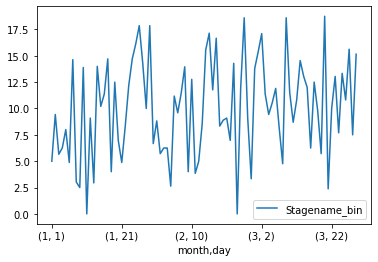

In [72]:
# Tracer la courbe du taux de conversion en fonction du temps

tdf.plot();

In [73]:
# Quelles sont les principales raisons de pertes des dossiers (Colonne: "Lost Reason"). A vous de définir comment faire... (Il y a plusieurs façons d'y parvenir)

tdf = df['Lost_reason'].to_frame()
tdf = tdf.groupby('Lost_reason')['Lost_reason'].count().sort_values(ascending=False)
tdf = tdf.to_frame().rename(columns={'Lost_reason' : 'Amount'})
tdf.head(5)

,Amount
Lost_reason,
N'a jamais répondu (+5 appels),620
Perdu contre autre banque,507
A répondu mais ne répond plus (+5 appels),396
Projet en recherche - Projet lointain,393
Dossier non finançable,371


In [113]:
# Le directeur marketing souhaite retravailler la répartition de son budget par canal. Quelles recommandations feriez-vous sur les canaux à prioriser

df['Gain'] = df['Amount']*df['Gagné']-df['Cout du lead'].apply(lambda x: x if x > 0 else 0)
df2 = df.groupby('Source_of_lead')['Source_of_lead'].count().to_frame().rename(columns={'Source_of_lead' : 'number_of_leads'})
df2['won_leads'] = df.groupby('Source_of_lead')['Gagné'].sum()
df2['total_gain'] =  df.groupby('Source_of_lead')['Gain'].sum()
df2['winrate'] = df2['won_leads']/df2['number_of_leads']
df2['average_gain'] = df.groupby('Source_of_lead')['Gain'].mean()
df2['sort'] = df2['winrate']*df2['average_gain']
df2.sort_values(by=['sort'], ascending=False, inplace=True)
df2

,number_of_leads,won_leads,total_gain,winrate,average_gain,sort
Source_of_lead,,,,,,
partner10,18,6,1173.0,0.333333,65.166667,21.722222
partner2,234,36,5245.0,0.153846,22.414530,3.448389
partner7,5,1,85.0,0.200000,17.000000,3.400000
partner9,553,65,7880.0,0.117541,14.249548,1.674902
partner6,154,26,1330.0,0.168831,8.636364,1.458087
partner4,426,58,3059.0,0.136150,7.180751,0.977661
partner3,45,2,355.0,0.044444,7.888889,0.350617
partner1,90,4,634.0,0.044444,7.044444,0.313086
partner5,24,1,-176.0,0.041667,-7.333333,-0.305556


In [112]:
df2.index.values.tolist() # Ordre de priorité

['partner10',
 'partner2',
 'partner7',
 'partner9',
 'partner6',
 'partner4',
 'partner3',
 'partner1',
 'partner5',
 'partner8']

In [120]:
# Au vu des questions posées dans la rubrique question, aurait-il été intéressant de supprimer les lignes pour lesquelles 'Cout du lead' = np.nan ?

cdl = df['Cout du lead'].isna().value_counts()
print(f"'Cout du lead' contient {cdl[True]} NaN, supprimer ces lignes correspondrait à supprimer {round(cdl[True]/(cdl[False]+cdl[True])*100)}% du dataset")

'Cout du lead' contient 2772 NaN, supprimer ces lignes correspondrait à supprimer 77% du dataset


In [121]:
# Est-il pertinent de remplacer les éléments NaN de la colonne 'Won' par 0 ? Si oui, le faire sinon laisser tel quel

"On a fait un get_dummies sur la colonne 'Stagename', remplacer les NaN de la colonne 'Won' par des 0 reviendrait à dédoubler la colonne 'Gagné' résultant du get_dummies."

"On a fait un get_dummies sur la colonne 'Stagename', remplacer les NaN de la colonne 'Won' par des 0 reviendrait à dédoubler la colonne 'Gagné' résultant du get_dummies."